# Proyecto OilyGiant - Extracción de petróleo

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression


In [7]:
# Cargar los datos
data0  = pd.read_csv('datasets/geo_data_0.csv')
data1  = pd.read_csv('datasets/geo_data_1.csv')
data2  = pd.read_csv('datasets/geo_data_2.csv')


In [8]:
# Analizar datos del primer conjunto
data0.info()
data0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [9]:
# Analizar datos del segundo conjunto
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
# Analizar datos del tercer conjunto
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
# Identificar valores duplicados
print("Valores duplicados de geo_data_0: ", data0.duplicated().sum())
print("Valores duplicados de geo_data_1: ", data1.duplicated().sum())
print("Valores duplicados de geo_data_2: ", data2.duplicated().sum())

Valores duplicados de geo_data_0:  0
Valores duplicados de geo_data_1:  0
Valores duplicados de geo_data_2:  0


In [13]:
def preparar_datos(path):
    df = pd.read_csv(path)
    features = df.drop(['product', 'id'], axis=1)
    target = df['product']
    return features, target, df

# Cargar datos de las tres regiones
features_0, target_0, df_0 = preparar_datos('datasets/geo_data_0.csv')
features_1, target_1, df_1 = preparar_datos('datasets/geo_data_1.csv')
features_2, target_2, df_2 = preparar_datos('datasets/geo_data_2.csv')


In [17]:
def train_and_evaluate_model(features, target):
    X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_valid)
    rmse = root_mean_squared_error(y_valid, predictions)
    mean_pred = predictions.mean()
    
    return model, predictions, y_valid.reset_index(drop=True), rmse, mean_pred

# Entrenar los modelos
model_0, preds_0, valid_0, rmse_0, mean_pred_0 = train_and_evaluate_model(features_0, target_0)
model_1, preds_1, valid_1, rmse_1, mean_pred_1 = train_and_evaluate_model(features_1, target_1)
model_2, preds_2, valid_2, rmse_2, mean_pred_2 = train_and_evaluate_model(features_2, target_2)

print("RMSE región 0:", rmse_0)
print("RMSE región 1:", rmse_1)
print("RMSE región 2:", rmse_2)

RMSE región 0: 37.5794217150813
RMSE región 1: 0.8930992867756168
RMSE región 2: 40.02970873393434


In [18]:
def calculate_profit(predictions, actuals):
    top_200_indices = predictions.argsort()[-200:]
    selected_actuals = actuals[top_200_indices]
    return selected_actuals.sum() * 4500 - 100000000

profit0 = calculate_profit(preds_0, valid_0)
profit1 = calculate_profit(preds_1, valid_1)
profit2 = calculate_profit(preds_2, valid_2)

print("Ganancias potenciales para 200 mejores pozos:\n")
print(f"Región 0: ${profit0:,.2f}")
print(f"Región 1: ${profit1:,.2f}")
print(f"Región 2: ${profit2:,.2f}")


Ganancias potenciales para 200 mejores pozos:

Región 0: $33,208,260.43
Región 1: $24,150,866.97
Región 2: $27,103,499.64


In [19]:
def bootstrap_profit(predictions, actuals, n=1000):
    state = np.random.RandomState(12345)
    values = []
    
    for _ in range(n):
        indices = state.choice(len(predictions), 500, replace=True)
        sample_preds = predictions[indices]
        sample_actuals = actuals[indices]
        top_200 = sample_actuals[sample_preds.argsort()[-200:]]
        profit = top_200.sum() * 4500 - 100_000_000
        values.append(profit)
        
    profits = pd.Series(values)
    
    return profits.mean(), profits.quantile([0.05, 0.95]), (profits < 0).mean()

mean_0, conf_0, risk_0 = bootstrap_profit(preds_0, valid_0.to_numpy())
mean_1, conf_1, risk_1 = bootstrap_profit(preds_1, valid_1.to_numpy())
mean_2, conf_2, risk_2 = bootstrap_profit(preds_2, valid_2.to_numpy())

print(f"Región 0 riesgo: {risk_0*100:,.2f}% | Confianza: {conf_0.values} | Promedio: ${mean_0:,.2f} \n")
print(f"Región 1 riesgo: {risk_1*100:,.2f}% | Confianza: {conf_1.values} | Promedio: ${mean_1:,.2f} \n")
print(f"Región 2 riesgo: {risk_2*100:,.2f}% | Confianza: {conf_2.values} | Promedio: ${mean_2:,.2f} \n")


Región 0 riesgo: 6.90% | Confianza: [-371815.96262546 8426881.61128137] | Promedio: $3,961,649.85 

Región 1 riesgo: 1.50% | Confianza: [1094757.21454802 7910055.13259456] | Promedio: $4,560,451.06 

Región 2 riesgo: 7.60% | Confianza: [-585334.41050501 8411239.96708137] | Promedio: $4,044,038.67 



In [20]:
def mostrar_resultados():
    resultados = pd.DataFrame({
        'Región': ['0', '1', '2'],
        'Beneficio promedio': [mean_0, mean_1, mean_2],
        'Riesgo de pérdida (%)': [risk_0 * 100, risk_1 * 100, risk_2 * 100],
        'IC 5%': [conf_0[0.05], conf_1[0.05], conf_2[0.05]],
        'IC 95%': [conf_0[0.95], conf_1[0.95], conf_2[0.95]],
    })
    display(resultados.sort_values(by='Beneficio promedio', ascending=False))

mostrar_resultados()

,Región,Beneficio promedio,Riesgo de pérdida (%),IC 5%,IC 95%
1,1,4.560451e+06,1.5,1.094757e+06,7.910055e+06
2,2,4.044039e+06,7.6,-5.853344e+05,8.411240e+06
0,0,3.961650e+06,6.9,-3.718160e+05,8.426882e+06


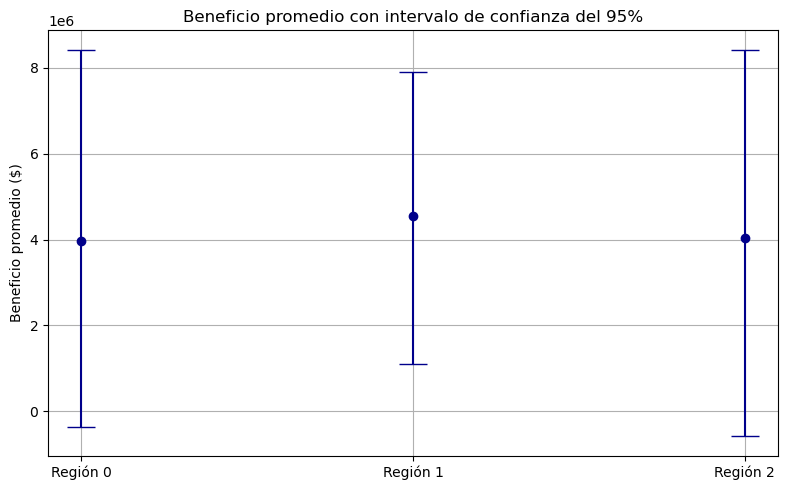

In [21]:
beneficios = [mean_0, mean_1, mean_2]
regiones = ['Región 0', 'Región 1', 'Región 2']

lower_bounds = [mean_0 - conf_0[0.05], mean_1 - conf_1[0.05], mean_2 - conf_2[0.05]]
upper_bounds = [conf_0[0.95] - mean_0, conf_1[0.95] - mean_1, conf_2[0.95] - mean_2]

plt.figure(figsize=(8, 5))
plt.errorbar(regiones, beneficios, yerr=[lower_bounds, upper_bounds], fmt='o', capsize=10, color='darkblue')
plt.ylabel("Beneficio promedio ($)")
plt.title("Beneficio promedio con intervalo de confianza del 95%")
plt.grid(True)
plt.tight_layout()
plt.show()


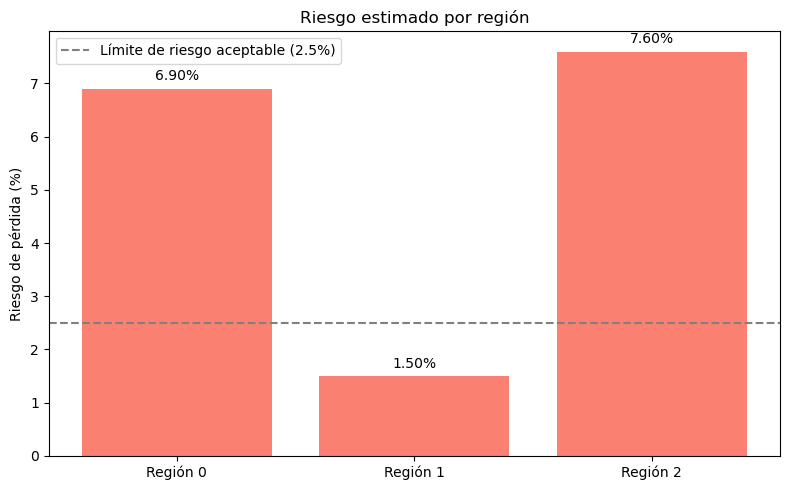

In [22]:
riesgos = [risk_0 * 100, risk_1 * 100, risk_2 * 100]

plt.figure(figsize=(8, 5))
bars = plt.bar(regiones, riesgos, color='salmon')
plt.ylabel("Riesgo de pérdida (%)")
plt.title("Riesgo estimado por región")

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}%", ha='center', va='bottom')

plt.axhline(2.5, color='gray', linestyle='--', label='Límite de riesgo aceptable (2.5%)')
plt.legend()
plt.tight_layout()
plt.show()


**CONCLUSIONES**

La región 1 fue la única que presentó una ganancia mayor en promedio por barril de $4,560,451.06 y un riesgo estimado del 1.5%, siendo menor al que se tenía contemplado (2.5%).